# Treatment T11

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
import imblearn


TREATMENT = "txx.prop"

export_folder = f"../data/output/diagrams/{TREATMENT}"
os.makedirs(export_folder, exist_ok=True)

dfs = {}
dfs_full = {}

result_df = pd.DataFrame(index=range(105))
index=["Proposer", "Proposer + DSS"]
stats = pd.DataFrame(index=index)

TREATMENTS = {"t00", "t10a", "t10b", "t11a", "t11b", "t11c"}

for treatment in TREATMENTS:

    # Read and sanitize the data
    df = pd.read_csv(f"../data/{treatment}/export/result__{treatment}_prop.csv")
    df_full = df.copy()
    # drop_cols = ["worker_id", "resp_worker_id", "prop_worker_id", "updated", "status", "job_id", "status", "timestamp", "rowid", "offer_dss", "offer", "offer_final", "completion_code"]
    drop_cols = ["worker_id", "resp_worker_id", "prop_worker_id", "updated", "status", "job_id", "status", "timestamp", "rowid", "offer_dss", "offer", "offer_final", "completion_code", "prop_time_spent"]
    df = df[[col for col in df.columns if col not in drop_cols]]
    
    dfs[treatment] = df
    dfs_full[treatment] = df_full
    result_df[treatment+"."+"offer"] = df_full["offer"]
    result_df[treatment+"."+"offer_final"] = df_full["offer_final"]
    stats[treatment.upper()] = [df_full["offer"].mean(), df_full["offer_final"].mean()]
    

cols = [col for col in df.columns if col != "min_offer"] + ["min_offer"]


/home/franck/anaconda3/envs/thesis/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
result_df.describe()

,t00.offer,t00.offer_final,t10a.offer,t10a.offer_final,t10b.offer,t10b.offer_final,t11b.offer,t11b.offer_final,t11c.offer,t11c.offer_final,t11a.offer,t11a.offer_final
count,103.000000,103.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,102.000000,102.000000,103.000000,103.000000
mean,43.592233,43.592233,41.476190,45.666667,44.714286,49.380952,46.666667,49.285714,44.558824,46.470588,46.990291,48.155340
std,14.974119,14.974119,15.315964,14.495800,16.782382,14.588840,17.929706,14.081298,19.180009,17.371711,13.920992,13.320894
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,40.000000,40.000000,35.000000,50.000000,40.000000,50.000000,40.000000,50.000000,40.000000,40.000000,45.000000,50.000000
50%,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
75%,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
max,100.000000,100.000000,80.000000,90.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


\begin{tabular}{lrrrrr}
\toprule
{} &       T10A &       T10B &       T11A &       T11B &       T11C \\
\midrule
Proposer       &  41.476190 &  44.714286 &  46.990291 &  46.666667 &  44.558824 \\
Proposer + DSS &  45.666667 &  49.380952 &  48.155340 &  49.285714 &  46.470588 \\
\bottomrule
\end{tabular}



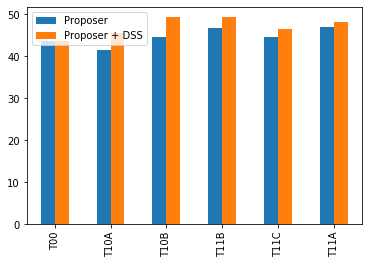

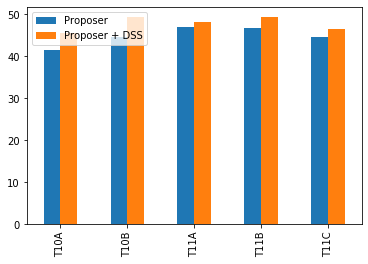

In [3]:
# sns.set()
stats.T.plot.bar()

tmp_stats = stats[["T10A", "T10B", "T11A", "T11B", "T11C"]]
tmp_stats.T.plot.bar()

100*(tmp_stats.iloc[1] - tmp_stats.iloc[0]) / tmp_stats.iloc[0]

# sns.barplot(y=index, data=stats.T)
print(tmp_stats.to_latex())

**Correlation to the target value**

**Responder's min_offer / Proposer's over and final_offer distribution**

../data/output/diagrams/txx.prop


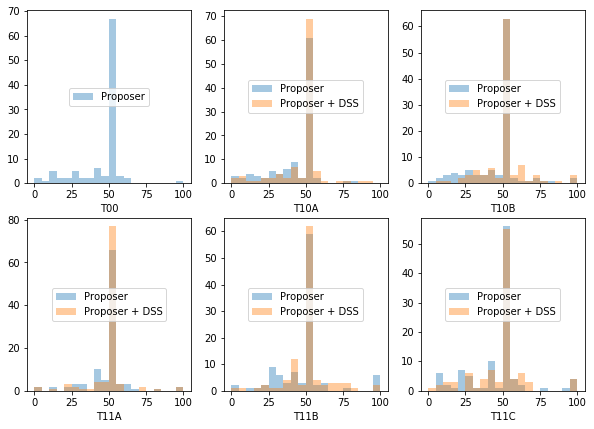

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

In [4]:

bins = list(range(0, 105, 5))

idx = 0

f, axes = plt.subplots(2, 3, figsize=(10, 7))

for treatment in sorted(TREATMENTS):
    df = dfs_full[treatment]
    fig = plt.figure(figsize=(5, 4))
    ax = sns.distplot(df["offer"], hist=True, kde=False, bins=bins, ax=axes[idx//3, idx%3],  axlabel=treatment.upper(), label="Proposer")
    _ = ax.legend()
    if treatment.upper() != "T00":
        ax = sns.distplot(df["offer_final"], hist=True, kde=False, bins=bins, ax=axes[idx//3, idx%3],  axlabel=treatment.upper(), label="Proposer + DSS")
    _ = ax.legend(loc="center")
    
    idx += 1

plt.tight_layout()
f.savefig(os.path.join(export_folder, "offers.pdf"), bbox_inches='tight')

print(export_folder)

In [5]:
np.histogram(df.offer)

(array([ 8,  8,  6, 11, 57,  6,  0,  1,  1,  4]),
 array([  5. ,  14.5,  24. ,  33.5,  43. ,  52.5,  62. ,  71.5,  81. ,
         90.5, 100. ]))

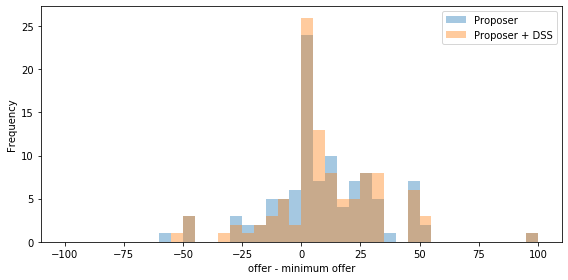

In [6]:
bins = list(range(-100, 105, 5))

plt.figure(figsize=(8,4))
offer_min_offer_diff = df_full["offer"] - df_full["min_offer"]
ax = sns.distplot(offer_min_offer_diff, hist=True, kde=False, axlabel="offer - minimum offer", bins=bins, label="Proposer")
_ = ax.set_ylabel("Frequency")


offer_min_offer_diff = df_full["offer_final"] - df_full["min_offer"]
ax = sns.distplot(offer_min_offer_diff, hist=True, kde=False, axlabel="offer - minimum offer", bins=bins, label="Proposer + DSS", ax=ax)
plt.legend()
plt.tight_layout()
ax.figure.savefig(os.path.join(export_folder, "offer-min_offer.pdf"))

In [7]:
from core.models.metrics import cross_compute, avg_gain_ratio, gain_mean, rejection_ratio, loss_sum, MAX_GAIN

def get_infos(min_offer, offer, metrics=None, do_cross_compute=False):
    if metrics is None:
        metrics = [avg_gain_ratio, gain_mean, rejection_ratio, loss_sum]
    #df = pd.DataFrame()
    infos = dict()
    for idx, metric in enumerate(metrics):
        if do_cross_compute:
            infos[metric.__name__] = cross_compute(min_offer, offer, metric)
        else:
            infos[metric.__name__] = metric(min_offer, offer)

    return infos

**Proposer's performance**

In [28]:
df_infos = pd.DataFrame()
#Human (fixed-matching) performance t00
df_infos = df_infos.append(get_infos(result_df['t13a.min_offer'], result_df['t11a.offer']), ignore_index=True)
#Human (cross-matched) average performance t00
# df_infos = df_infos.append(get_infos(df_full['min_offer'], df_full['offer'], do_cross_compute=True), ignore_index=True)
#Human + DSS (fixed-matching) performance t00
# df_infos = df_infos.append(get_infos(df_full['min_offer'], df_full['offer_final']), ignore_index=True)
#Human + DSS(cross-matched) average performance t00
df_infos = df_infos.append(get_infos(result_df['t13a.min_offer_final'], result_df['t11a.offer_final']), ignore_index=True)
#Top-model (fixed 50% prediction) average performance t00
fixed_offer = MAX_GAIN // 2
df_infos = df_infos.append(get_infos(df_full['min_offer'], [fixed_offer], do_cross_compute=True), ignore_index=True)

df_infos.index = ["Proposer vs Responder", "Proposer + DSS vs Responder + DSS"]

# df_infos = df_infos.loc[["Proposer", "Proposer + DSS", "AI-System"]]
df_infos


KeyError: 't13a.min_offer'

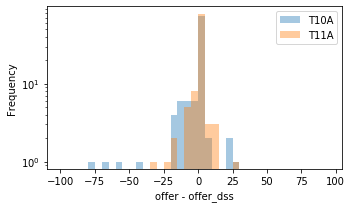

In [23]:

plt.figure(figsize=(5,3))
tmp = pd.DataFrame()
tmp["t10a#offer"] = result_df["t10a.offer"] - result_df["t10a.offer_final"]
tmp["t11a#offer"] = result_df["t11a.offer"] - result_df["t11a.offer_final"]


bins = np.arange(-100, 100, 5)
ax = sns.distplot(tmp["t10a#offer"], hist=True, kde=False, axlabel="Responder minimum offer", bins=bins, label="T10A")
ax = sns.distplot(tmp["t11a#offer"], hist=True, kde=False, axlabel="offer - offer_dss", bins=bins, label="T11A")
ax.legend(loc='best')
_ = ax.set_ylabel("Frequency")
ax.set_yscale('log')
plt.tight_layout()


ax.figure.savefig(os.path.join(export_folder, "t10avst11adiff.pdf"))

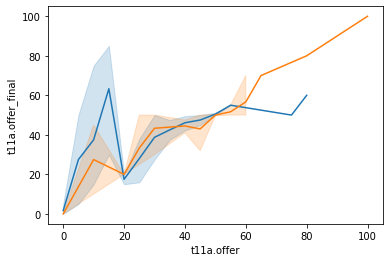

In [10]:
sns.lineplot(x="t10a.offer", y="t10a.offer_final", data=result_df)
sns.lineplot(x="t11a.offer", y="t11a.offer_final", data=result_df)

In [11]:
tmp.describe()

,t10a#offer,t11a#offer
count,105.000000,103.000000
mean,-4.190476,-1.165049
std,13.956040,6.424672
min,-80.000000,-35.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,25.000000,25.000000


Index(['ai_calls_acceptance_probability', 'ai_calls_best_offer_probability',
       'ai_calls_count_repeated', 'ai_calls_offers', 'ai_calls_pauses',
       'ai_nb_calls', 'ai_offer', 'cc_beta', 'cc_criterion',
       'cc_false_alarm_avg_click_delay', 'cc_false_alarm_rate',
       'cc_false_alarms', 'cc_hit_avg_click_delay', 'cc_hit_rate', 'cc_hits',
       'cc_sensitivity', 'completion_code', 'cpc_expected_value',
       'cpc_expected_value_max', 'cpc_expected_value_min', 'cpc_q1', 'cpc_q10',
       'cpc_q2', 'cpc_q3', 'cpc_q4', 'cpc_q5', 'cpc_q6', 'cpc_q7', 'cpc_q8',
       'cpc_q9', 'cpc_time_spent', 'exp_ultimatum_game_experience',
       'feedback_accuracy', 'feedback_alternative', 'feedback_explanation',
       'feedback_understanding', 'job_id', 'min_offer', 'model_type', 'offer',
       'offer_dss', 'offer_final', 'prop_time_spent', 'prop_time_spent_dss',
       'prop_worker_id', 'ras_assertiveness', 'ras_q1', 'ras_q10', 'ras_q11',
       'ras_q12', 'ras_q13', 'ras_q14', 'ras_q1